In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
import torchvision
import torch.optim as optim
import pytorch_lightning as pl
import copy
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import torchmetrics
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device=torch.device("cpu")
print(device)

cuda:0


In [3]:
classes=['Covid','No Covid']
num_classes=2
batch_size=4

In [4]:
dataset = torchvision.datasets.ImageFolder(root="./data",transform=transforms.Compose([
                                                            transforms.ToTensor(),
                                                            transforms.Resize([227,227]),
#                                                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                                            ]))

In [5]:
print(len(dataset))
trainset,testset=torch.utils.data.random_split(dataset,[round(0.8*len(dataset)),round(0.2*len(dataset))],generator=torch.Generator().manual_seed(42))
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

8088


In [6]:
class CNN(nn.Module):
    def get_first_FC_Layer(self,x):
            x=self.representation_network(x).flatten(1)
            x=self.classification_network[0](x)
            return x;
    def get_Representation_Net(self,x):
            x=self.representation_network(x).flatten(1)
            return  x;
    def __init__(self):
        
        super(CNN,self).__init__()
        self.representation_network=nn.Sequential(
            nn.Conv2d(3,32,3), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2,stride=3),
            nn.Conv2d(32,32,3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=3),
        )
        self.classification_network=nn.Sequential(
            nn.Linear(18432,512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,1),
#             nn.Sigmoid()
        )
    def forward(self,x):
#         print(x.shape)
        x=self.representation_network(x)
#         print(x.shape)
        # flattening of the vector=> same dimension of first index(batch size) , everythign else is flattened(-1)
        x=x.view(x.size(0),-1)
#         print(x.shape)
        x=self.classification_network(x)
#         print(x.shape)
        return x

In [7]:
net = CNN()
net.load_state_dict(torch.load("CNN-1_final.pth").state_dict())

<All keys matched successfully>

In [8]:
def evaluation(dataloader,model):
    model.eval()
    with torch.no_grad():
        total,correct=0,0
        for data in dataloader:
            inputs,labels=data
            inputs,labels=inputs.to(device),labels.to(device)
            outputs=model(inputs)
    #         print(outputs)
    #         print(outputs,labels)
            m = nn.Sigmoid()
            outputs=m(outputs)
            pred=outputs>=0.5
            pred=pred.flatten()
            total+=labels.size(0)
            # labels=torch.add(labels,-1)
            # print(pred,labels)
    #         print(list(map(lambda a: classes[a],pred)),list(map(lambda a: classes[a],labels)))
            correct+=(pred==labels).sum().item()
    print(correct,total)
    model.train()
    return 100*correct/total

In [9]:
%%notify -m "Completed"

X_Train=np.empty((0,512))
Y_Train=np.empty((0,batch_size))
print(X_Train.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train=np.append(X_Train,FCLayer,axis=0)
    Y_Train=np.append(Y_Train,labels.numpy())
print(X_Train.shape,Y_Train.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371
Done with the batch: 372


Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699
Done with the batch: 700
Done with the batch: 701
Done with the batch: 702


Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 1026
Done with the batch: 1027
Done with the batch: 1028
Done with the batch: 

Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with the batch: 1342
Done with the batch: 1343
Done with the batch: 1344
Done with th

<IPython.core.display.Javascript object>

In [10]:
%%notify -m "Completed"
X_Test=np.empty((0,512))
Y_Test=np.empty((0,batch_size))
print(X_Test.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test=np.append(X_Test,FCLayer,axis=0)
    Y_Test=np.append(Y_Test,labels.numpy())
print(X_Test.shape,Y_Test.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


<IPython.core.display.Javascript object>

## Getting the feature extraction layer

In [11]:
%%notify -m "Completed"
X_Train_FeatureMap=np.empty((0,18432))
Y_Train_FeatureMap=np.empty((0,batch_size))
print(X_Train_FeatureMap.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featureMap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train_FeatureMap=np.append(X_Train_FeatureMap,featureMap,axis=0)
    Y_Train_FeatureMap=np.append(Y_Train_FeatureMap,labels.numpy())
print(X_Train_FeatureMap.shape,Y_Train_FeatureMap.shape)

(0, 18432)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the b

Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371
Done with the batch: 372


Done with the batch: 661
Done with the batch: 662
Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699
Done with the batch: 700


Done with the batch: 989
Done with the batch: 990
Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 1026
Done with the batch: 10

Done with the batch: 1305
Done with the batch: 1306
Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with the batch: 1342
Done with th

<IPython.core.display.Javascript object>

In [12]:
%%notify -m "Completed"
X_Test_FeatureMap=np.empty((0,18432))
Y_Test_FeatureMap=np.empty((0,batch_size))
print(X_Test_FeatureMap.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featuremap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test_FeatureMap=np.append(X_Test_FeatureMap,featuremap,axis=0)
    Y_Test_FeatureMap=np.append(Y_Test_FeatureMap,labels.numpy())
print(X_Test_FeatureMap.shape,Y_Test_FeatureMap.shape)

(0, 18432)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the b

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


<IPython.core.display.Javascript object>

## SVM

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold

In [26]:
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-2,0.1,1,10],
                     'C': [0.001,0.1,1, 10, 100],
}
# tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3],
#                      'C': [0.001],
#                    }
clf = GridSearchCV(
        SVC(), tuned_parameters, scoring= 'accuracy',verbose=10
    )
clf.fit(X_Train, Y_Train.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 1/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.501 total time=  11.3s
[CV 2/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 2/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.502 total time=  11.5s
[CV 3/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 3/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.502 total time=  10.3s
[CV 4/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 4/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.502 total time=  10.3s
[CV 5/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 5/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.502 total time=  10.2s
[CV 1/5; 2/25] START C=0.001, gamma=0.01, kernel=rbf............................
[CV 1/5; 2/25] END C=0.001,

[CV 1/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.954 total time=   4.6s
[CV 2/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 2/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.949 total time=   4.7s
[CV 3/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 3/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.945 total time=   4.5s
[CV 4/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 4/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.959 total time=   4.7s
[CV 5/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 5/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.957 total time=   4.7s
[CV 1/5; 12/25] START C=1, gamma=0.01, kernel=rbf...............................
[CV 1/5; 12/25] END C=1, gamma=0.01, kernel=rbf;, score=0.652 total time=  10.0s
[CV 2/5; 12/25] START C=1, gamma=0.01, kernel=rbf...............................
[CV 2/5; 12/25] END C=1

[CV 2/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.946 total time=   4.5s
[CV 3/5; 21/25] START C=100, gamma=0.001, kernel=rbf............................
[CV 3/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.944 total time=   4.3s
[CV 4/5; 21/25] START C=100, gamma=0.001, kernel=rbf............................
[CV 4/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.951 total time=   4.6s
[CV 5/5; 21/25] START C=100, gamma=0.001, kernel=rbf............................
[CV 5/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.958 total time=   4.4s
[CV 1/5; 22/25] START C=100, gamma=0.01, kernel=rbf.............................
[CV 1/5; 22/25] END C=100, gamma=0.01, kernel=rbf;, score=0.657 total time=  10.1s
[CV 2/5; 22/25] START C=100, gamma=0.01, kernel=rbf.............................
[CV 2/5; 22/25] END C=100, gamma=0.01, kernel=rbf;, score=0.685 total time=   9.9s
[CV 3/5; 22/25] START C=100, gamma=0.01, kernel=rbf.............................
[CV 3/5; 22/

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [31]:
def k_fold_cv_svm(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
#         clf=SVC(C=10,kernel='rbf',gamma=0.0001)
        clf=SVC(C=10,kernel='rbf',gamma=10)
        clf.fit(X_train,y_train.ravel())
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [15]:
clf=k_fold_cv_svm(X_Train,Y_Train.ravel())
clf=SVC(C=10,kernel='rbf',gamma=1e-5)
clf.fit(X_Train,Y_Train.ravel())
y_pred = clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 96.29057187017001
FOLD 1
--------------------------------
Accuracy: 96.44513137557959
FOLD 2
--------------------------------
Accuracy: 95.90417310664606
FOLD 3
--------------------------------
Accuracy: 96.36785162287481
FOLD 4
--------------------------------
Accuracy: 97.2952086553323
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 96.29057187017001 %
Fold 1: 96.44513137557959 %
Fold 2: 95.90417310664606 %
Fold 3: 96.36785162287481 %
Fold 4: 97.2952086553323 %
Average: 96.46058732612056 %
Accuracy:  0.9320148331273177
F1-Score:  0.9334140435835352
Precision:  0.9244604316546763
Recall:  0.9425427872860636
AUC:  0.9318963936430317


## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
def k_fold_cv_dtree(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        decision_tree = DecisionTreeClassifier(random_state=102)
        decision_tree = decision_tree.fit(X_train, y_train.ravel())
        y_pred = decision_tree.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del decision_tree
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return decision_tree

In [18]:
dtree=k_fold_cv_dtree(X_Train,Y_Train.ravel())
dtree = DecisionTreeClassifier(random_state=102)
dtree = dtree.fit(X_Train, Y_Train.ravel())
y_pred=dtree.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 93.58578052550232
FOLD 1
--------------------------------
Accuracy: 93.89489953632149
FOLD 2
--------------------------------
Accuracy: 92.42658423493046
FOLD 3
--------------------------------
Accuracy: 92.50386398763524
FOLD 4
--------------------------------
Accuracy: 93.35394126738794
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 93.58578052550232 %
Fold 1: 93.89489953632149 %
Fold 2: 92.42658423493046 %
Fold 3: 92.50386398763524 %
Fold 4: 93.35394126738794 %
Average: 93.1530139103555 %
Accuracy:  0.896168108776267
F1-Score:  0.8992805755395683
Precision:  0.8823529411764706
Recall:  0.9168704156479217
AUC:  0.8959352078239609


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
def k_fold_cv_rforest(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
        random_forest = random_forest.fit(X_train, y_train.ravel())
        y_pred = random_forest.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del random_forest
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return random_forest

In [21]:
random_forest=k_fold_cv_rforest(X_Train,Y_Train.ravel())
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
random_forest = random_forest.fit(X_Train, Y_Train.ravel())
y_pred=random_forest.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 96.98608964451314
FOLD 1
--------------------------------
Accuracy: 96.44513137557959
FOLD 2
--------------------------------
Accuracy: 96.13601236476043
FOLD 3
--------------------------------
Accuracy: 95.90417310664606
FOLD 4
--------------------------------
Accuracy: 95.74961360123648
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 96.98608964451314 %
Fold 1: 96.44513137557959 %
Fold 2: 96.13601236476043 %
Fold 3: 95.90417310664606 %
Fold 4: 95.74961360123648 %
Average: 96.24420401854714 %
Accuracy:  0.9227441285537701
F1-Score:  0.924653405666064
Precision:  0.9120095124851367
Recall:  0.9376528117359413
AUC:  0.9225764058679706


## XGBOOST

In [22]:
import xgboost as xgb

In [23]:
def k_fold_cv_xgb(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        eval_set = [(X_train, y_train.ravel()), (X_test, y_test)]
        xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
        xg_cl.fit(X_train,y_train.ravel())
        y_pred = xg_cl.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del xg_cl
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return xg_cl

In [24]:
xg=k_fold_cv_xgb(X_Train,Y_Train.ravel())
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
xg.fit(X_Train,Y_Train.ravel())
y_pred=xg.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
[16:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 96.44513137557959
FOLD 1
--------------------------------
[16:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 96.44513137557959
FOLD 2
--------------------------------
[16:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

## MLP

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
def k_fold_cv_mlp(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        clf = MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [27]:
clf=k_fold_cv_mlp(X_Train,Y_Train.ravel())
clf=MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_Train, Y_Train.ravel())
y_pred=clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 0.54593410
Iteration 2, loss = 0.22878559
Iteration 3, loss = 0.16003129
Iteration 4, loss = 0.13774859
Iteration 5, loss = 0.12412354
Iteration 6, loss = 0.11117233
Iteration 7, loss = 0.10380421
Iteration 8, loss = 0.10891287
Iteration 9, loss = 0.10628621
Iteration 10, loss = 0.09000050
Iteration 11, loss = 0.08255127
Iteration 12, loss = 0.08004466
Iteration 13, loss = 0.07846185
Iteration 14, loss = 0.07312209
Iteration 15, loss = 0.07290612
Iteration 16, loss = 0.06944455
Iteration 17, loss = 0.07156597
Iteration 18, loss = 0.06997977
Iteration 19, loss = 0.07172111
Iteration 20, loss = 0.06553321
Iteration 21, loss = 0.06365331
Iteration 22, loss = 0.06350726
Iteration 23, loss = 0.06173899
Iteration 24, loss = 0.06023843
Iteration 25, loss = 0.05996533
Iteration 26, loss = 0.05569646
Iteration 27, loss = 0.05993054
Iteration 28, loss = 0.05179110
Iteration 29, loss = 0.05938255
Iteration 30, loss = 0.05200380
Iteration

Iteration 89, loss = 0.02431730
Iteration 90, loss = 0.02562028
Iteration 91, loss = 0.02713848
Iteration 92, loss = 0.02512891
Iteration 93, loss = 0.02196572
Iteration 94, loss = 0.02998886
Iteration 95, loss = 0.02626398
Iteration 96, loss = 0.02511460
Iteration 97, loss = 0.02113427
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 95.74961360123648
FOLD 3
--------------------------------
Iteration 1, loss = 0.46657772
Iteration 2, loss = 0.20149834
Iteration 3, loss = 0.14948906
Iteration 4, loss = 0.12914764
Iteration 5, loss = 0.11472844
Iteration 6, loss = 0.11221789
Iteration 7, loss = 0.10406361
Iteration 8, loss = 0.09732821
Iteration 9, loss = 0.09127905
Iteration 10, loss = 0.08372990
Iteration 11, loss = 0.09139940
Iteration 12, loss = 0.07860140
Iteration 13, loss = 0.07291668
Iteration 14, loss = 0.07835053
Iteration 15, loss = 0.07425021
Iteration 16, loss = 0.07028730
Iteration 17, loss = 0.06646935
Iteration 18, loss 

Iteration 70, loss = 0.04007921
Iteration 71, loss = 0.03615046
Iteration 72, loss = 0.03985481
Iteration 73, loss = 0.03752480
Iteration 74, loss = 0.03444422
Iteration 75, loss = 0.03678000
Iteration 76, loss = 0.03973426
Iteration 77, loss = 0.03508824
Iteration 78, loss = 0.03593198
Iteration 79, loss = 0.03269950
Iteration 80, loss = 0.03536098
Iteration 81, loss = 0.03158061
Iteration 82, loss = 0.03211974
Iteration 83, loss = 0.02854969
Iteration 84, loss = 0.03270376
Iteration 85, loss = 0.03725369
Iteration 86, loss = 0.03113977
Iteration 87, loss = 0.03485723
Iteration 88, loss = 0.03146723
Iteration 89, loss = 0.03210284
Iteration 90, loss = 0.02825686
Iteration 91, loss = 0.02788985
Iteration 92, loss = 0.02825631
Iteration 93, loss = 0.03216566
Iteration 94, loss = 0.03277241
Iteration 95, loss = 0.02942129
Iteration 96, loss = 0.03129932
Iteration 97, loss = 0.04278163
Iteration 98, loss = 0.03824175
Iteration 99, loss = 0.03611954
Iteration 100, loss = 0.03350470
Iterati

## PCA

In [28]:
from sklearn.decomposition import KernelPCA

Text(0, 0.5, 'cumulative explained variance')

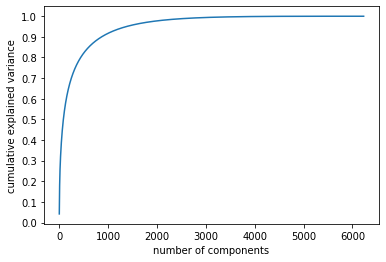

In [18]:
kpca = KernelPCA(kernel = 'rbf')
kpca_transform = kpca.fit_transform(X_Train_FeatureMap)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [29]:
kpca = KernelPCA(kernel = 'rbf',n_components=3500)
X_Train_Transformed_FeatureMap = kpca.fit_transform(X_Train_FeatureMap)
print(X_Train_Transformed_FeatureMap.shape)

(6470, 3500)


In [30]:
X_Test_Transformed_FeatureMap = kpca.transform(X_Test_FeatureMap)
print(X_Test_FeatureMap.shape,X_Test_Transformed_FeatureMap.shape)

(1618, 18432) (1618, 3500)


## SVM

In [65]:
# %% notify -m "GridCV"
tuned_parameters = {'kernel': ['rbf'], 'gamma': [10],
                     'C': [10],
}
clf = GridSearchCV(
        SVC(), tuned_parameters, scoring= 'accuracy',verbose=10
    )
clf.fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 1/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.942 total time=  33.6s
[CV 2/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 2/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.933 total time=  33.2s
[CV 3/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 3/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.928 total time=  29.0s
[CV 4/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 4/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.927 total time=  33.1s
[CV 5/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 5/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.923 total time=  32.1s
[CV 1/5; 2/2] START C=10, gamma=100, kernel=rbf.................................
[CV 1/5; 2/2] END ..C=10, gamma=100, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'gamma': [10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [32]:
clf=k_fold_cv_svm(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
clf=SVC(C=10,kernel='rbf',gamma=10)
clf.fit(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 93.43122102009274
FOLD 1
--------------------------------
Accuracy: 92.65842349304482
FOLD 2
--------------------------------
Accuracy: 92.8129829984544
FOLD 3
--------------------------------
Accuracy: 93.43122102009274
FOLD 4
--------------------------------
Accuracy: 92.42658423493046
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 93.43122102009274 %
Fold 1: 92.65842349304482 %
Fold 2: 92.8129829984544 %
Fold 3: 93.43122102009274 %
Fold 4: 92.42658423493046 %
Average: 92.95208655332303 %
Accuracy:  0.9258343634116193
F1-Score:  0.9283154121863798
Precision:  0.9077102803738317
Recall:  0.9498777506112469
AUC:  0.9255638753056233


## Decision Tree

In [33]:
dtree=k_fold_cv_dtree(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
dtree = DecisionTreeClassifier(random_state=102)
dtree = dtree.fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())
y_pred=dtree.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 81.14374034003092
FOLD 1
--------------------------------
Accuracy: 80.91190108191654
FOLD 2
--------------------------------
Accuracy: 81.60741885625966
FOLD 3
--------------------------------
Accuracy: 82.22565687789799
FOLD 4
--------------------------------
Accuracy: 80.83462132921174
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 81.14374034003092 %
Fold 1: 80.91190108191654 %
Fold 2: 81.60741885625966 %
Fold 3: 82.22565687789799 %
Fold 4: 80.83462132921174 %
Average: 81.34466769706339 %
Accuracy:  0.7707045735475896
F1-Score:  0.7766405779650812
Precision:  0.7651245551601423
Recall:  0.7885085574572127
AUC:  0.7705042787286063


## XGBOOST

In [34]:
xg=k_fold_cv_xgb(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
xg.fit(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=xg.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
[16:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 89.10355486862443
FOLD 1
--------------------------------
[16:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.26275115919628
FOLD 2
--------------------------------
[16:29:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

## MLP

In [35]:
clf=k_fold_cv_mlp(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
clf=MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 0.69215904
Iteration 2, loss = 0.68694829
Iteration 3, loss = 0.68024130
Iteration 4, loss = 0.67020181
Iteration 5, loss = 0.65678640
Iteration 6, loss = 0.64063067
Iteration 7, loss = 0.62079675
Iteration 8, loss = 0.59857379
Iteration 9, loss = 0.57444140
Iteration 10, loss = 0.54911267
Iteration 11, loss = 0.52306119
Iteration 12, loss = 0.49691893
Iteration 13, loss = 0.47023067
Iteration 14, loss = 0.44512251
Iteration 15, loss = 0.42011858
Iteration 16, loss = 0.39691895
Iteration 17, loss = 0.37484915
Iteration 18, loss = 0.35394805
Iteration 19, loss = 0.33441979
Iteration 20, loss = 0.31618121
Iteration 21, loss = 0.29945088
Iteration 22, loss = 0.28415109
Iteration 23, loss = 0.26934807
Iteration 24, loss = 0.25637502
Iteration 25, loss = 0.24457242
Iteration 26, loss = 0.23313428
Iteration 27, loss = 0.22285306
Iteration 28, loss = 0.21280646
Iteration 29, loss = 0.20385161
Iteration 30, loss = 0.19576282
Iteration

Iteration 252, loss = 0.02870582
Iteration 253, loss = 0.02909925
Iteration 254, loss = 0.02878971
Iteration 255, loss = 0.02847538
Iteration 256, loss = 0.02859247
Iteration 257, loss = 0.02842463
Iteration 258, loss = 0.02866242
Iteration 259, loss = 0.02836003
Iteration 260, loss = 0.02841000
Iteration 261, loss = 0.02858764
Iteration 262, loss = 0.02820903
Iteration 263, loss = 0.02806907
Iteration 264, loss = 0.02802816
Iteration 265, loss = 0.02812450
Iteration 266, loss = 0.02833978
Iteration 267, loss = 0.02789063
Iteration 268, loss = 0.02767712
Iteration 269, loss = 0.02787500
Iteration 270, loss = 0.02813822
Iteration 271, loss = 0.02788252
Iteration 272, loss = 0.02808189
Iteration 273, loss = 0.02745597
Iteration 274, loss = 0.02755038
Iteration 275, loss = 0.02752551
Iteration 276, loss = 0.02757229
Iteration 277, loss = 0.02757013
Iteration 278, loss = 0.02732269
Iteration 279, loss = 0.02750715
Iteration 280, loss = 0.02734302
Iteration 281, loss = 0.02731295
Iteration 

Iteration 144, loss = 0.04014493
Iteration 145, loss = 0.03980739
Iteration 146, loss = 0.04024172
Iteration 147, loss = 0.03954605
Iteration 148, loss = 0.03929497
Iteration 149, loss = 0.03911170
Iteration 150, loss = 0.03897824
Iteration 151, loss = 0.03915074
Iteration 152, loss = 0.03878622
Iteration 153, loss = 0.03855574
Iteration 154, loss = 0.03822550
Iteration 155, loss = 0.03846441
Iteration 156, loss = 0.03781829
Iteration 157, loss = 0.03792134
Iteration 158, loss = 0.03779072
Iteration 159, loss = 0.03747263
Iteration 160, loss = 0.03740940
Iteration 161, loss = 0.03722516
Iteration 162, loss = 0.03721270
Iteration 163, loss = 0.03697021
Iteration 164, loss = 0.03696436
Iteration 165, loss = 0.03739308
Iteration 166, loss = 0.03657522
Iteration 167, loss = 0.03740825
Iteration 168, loss = 0.03634073
Iteration 169, loss = 0.03612997
Iteration 170, loss = 0.03593399
Iteration 171, loss = 0.03581571
Iteration 172, loss = 0.03613692
Iteration 173, loss = 0.03562391
Iteration 

Iteration 89, loss = 0.05475090
Iteration 90, loss = 0.05437452
Iteration 91, loss = 0.05374947
Iteration 92, loss = 0.05306567
Iteration 93, loss = 0.05245773
Iteration 94, loss = 0.05195200
Iteration 95, loss = 0.05134474
Iteration 96, loss = 0.05086078
Iteration 97, loss = 0.05089874
Iteration 98, loss = 0.04991278
Iteration 99, loss = 0.04963924
Iteration 100, loss = 0.04908679
Iteration 101, loss = 0.04845442
Iteration 102, loss = 0.04833447
Iteration 103, loss = 0.04760931
Iteration 104, loss = 0.04725281
Iteration 105, loss = 0.04688893
Iteration 106, loss = 0.04642666
Iteration 107, loss = 0.04615937
Iteration 108, loss = 0.04567286
Iteration 109, loss = 0.04536752
Iteration 110, loss = 0.04484022
Iteration 111, loss = 0.04457771
Iteration 112, loss = 0.04421880
Iteration 113, loss = 0.04393461
Iteration 114, loss = 0.04413674
Iteration 115, loss = 0.04326770
Iteration 116, loss = 0.04297766
Iteration 117, loss = 0.04261580
Iteration 118, loss = 0.04240936
Iteration 119, loss =

Iteration 45, loss = 0.11999578
Iteration 46, loss = 0.11704155
Iteration 47, loss = 0.11399706
Iteration 48, loss = 0.11151467
Iteration 49, loss = 0.10888368
Iteration 50, loss = 0.10648219
Iteration 51, loss = 0.10406337
Iteration 52, loss = 0.10216288
Iteration 53, loss = 0.09975864
Iteration 54, loss = 0.09774044
Iteration 55, loss = 0.09586673
Iteration 56, loss = 0.09399566
Iteration 57, loss = 0.09214160
Iteration 58, loss = 0.09021926
Iteration 59, loss = 0.08891237
Iteration 60, loss = 0.08733086
Iteration 61, loss = 0.08576010
Iteration 62, loss = 0.08408534
Iteration 63, loss = 0.08257034
Iteration 64, loss = 0.08129226
Iteration 65, loss = 0.08001873
Iteration 66, loss = 0.07886502
Iteration 67, loss = 0.07745669
Iteration 68, loss = 0.07634584
Iteration 69, loss = 0.07516583
Iteration 70, loss = 0.07403341
Iteration 71, loss = 0.07299863
Iteration 72, loss = 0.07191088
Iteration 73, loss = 0.07106952
Iteration 74, loss = 0.07005417
Iteration 75, loss = 0.06916945
Iteratio

Iteration 295, loss = 0.02746722
Iteration 296, loss = 0.02754854
Iteration 297, loss = 0.02749754
Iteration 298, loss = 0.02741624
Iteration 299, loss = 0.02746214
Iteration 300, loss = 0.02733934
Iteration 301, loss = 0.02726688
Iteration 302, loss = 0.02725981
Iteration 303, loss = 0.02735287
Iteration 304, loss = 0.02711124
Iteration 305, loss = 0.02715416
Iteration 306, loss = 0.02733482
Iteration 307, loss = 0.02687339
Iteration 308, loss = 0.02715780
Iteration 309, loss = 0.02686581
Iteration 310, loss = 0.02718477
Iteration 311, loss = 0.02704610
Iteration 312, loss = 0.02698338
Iteration 313, loss = 0.02683147
Iteration 314, loss = 0.02679193
Iteration 315, loss = 0.02688337
Iteration 316, loss = 0.02702309
Iteration 317, loss = 0.02676473
Iteration 318, loss = 0.02684801
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 91.57650695517773
FOLD 4
--------------------------------
Iteration 1, loss = 0.69225011
Iteration 2, loss =

Iteration 224, loss = 0.02961865
Iteration 225, loss = 0.02966182
Iteration 226, loss = 0.02966716
Iteration 227, loss = 0.02980677
Iteration 228, loss = 0.02932859
Iteration 229, loss = 0.02932543
Iteration 230, loss = 0.02919365
Iteration 231, loss = 0.02909309
Iteration 232, loss = 0.02926480
Iteration 233, loss = 0.02961888
Iteration 234, loss = 0.02995826
Iteration 235, loss = 0.02935488
Iteration 236, loss = 0.02925359
Iteration 237, loss = 0.02895283
Iteration 238, loss = 0.02893369
Iteration 239, loss = 0.02882238
Iteration 240, loss = 0.02866868
Iteration 241, loss = 0.02867243
Iteration 242, loss = 0.02865424
Iteration 243, loss = 0.02866525
Iteration 244, loss = 0.02844130
Iteration 245, loss = 0.02862943
Iteration 246, loss = 0.02839482
Iteration 247, loss = 0.02832809
Iteration 248, loss = 0.02821087
Iteration 249, loss = 0.02821199
Iteration 250, loss = 0.02812455
Iteration 251, loss = 0.02830480
Iteration 252, loss = 0.02814572
Iteration 253, loss = 0.02831969
Iteration 

Iteration 132, loss = 0.04178067
Iteration 133, loss = 0.04164141
Iteration 134, loss = 0.04126807
Iteration 135, loss = 0.04116827
Iteration 136, loss = 0.04091685
Iteration 137, loss = 0.04072281
Iteration 138, loss = 0.04049066
Iteration 139, loss = 0.04027090
Iteration 140, loss = 0.04024452
Iteration 141, loss = 0.04009054
Iteration 142, loss = 0.03995420
Iteration 143, loss = 0.03968997
Iteration 144, loss = 0.03990614
Iteration 145, loss = 0.03928193
Iteration 146, loss = 0.03933397
Iteration 147, loss = 0.03924429
Iteration 148, loss = 0.03904208
Iteration 149, loss = 0.03878403
Iteration 150, loss = 0.03860364
Iteration 151, loss = 0.03843142
Iteration 152, loss = 0.03833499
Iteration 153, loss = 0.03815291
Iteration 154, loss = 0.03800293
Iteration 155, loss = 0.03839202
Iteration 156, loss = 0.03790869
Iteration 157, loss = 0.03829860
Iteration 158, loss = 0.03779068
Iteration 159, loss = 0.03747993
Iteration 160, loss = 0.03736130
Iteration 161, loss = 0.03715460
Iteration 

## Random Forest

In [36]:
random_forest=k_fold_cv_rforest(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
random_forest = random_forest.fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())
y_pred=random_forest.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 80.98918083462134
FOLD 1
--------------------------------
Accuracy: 82.38021638330757
FOLD 2
--------------------------------
Accuracy: 82.68933539412674
FOLD 3
--------------------------------
Accuracy: 81.45285935085008
FOLD 4
--------------------------------
Accuracy: 82.61205564142195
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 80.98918083462134 %
Fold 1: 82.38021638330757 %
Fold 2: 82.68933539412674 %
Fold 3: 81.45285935085008 %
Fold 4: 82.61205564142195 %
Average: 82.02472952086553 %
Accuracy:  0.8065512978986403
F1-Score:  0.8101879927228622
Precision:  0.8038507821901324
Recall:  0.8166259168704156
AUC:  0.8064379584352079
